In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries

Using TensorFlow backend.


This program uses important tools from the Keras program, specifically the core and recurrent modules. These modules have helpful functions for making neural networks. The Sequential module is also used, as it lets you add layers to the neural network easily. The time module is also used, which is a built-in part of Python that helps with timing. The main goal of this program is to provide the basics for making a neural network using Keras. By using these modules and libraries, the user can access ready-made functions and tools to make the process of creating a neural network simpler. This code does not actually create a neural network, but instead prepares the way for building one by bringing in the necessary resources.

**WHY USE LSTM? Is it good to predict re-occuring data?I didn't get great results from the 1st notebook and decided to try to predict stock price movements by giving in stock price movements instead of just simple stock prices as input**


**In this notebook I normalized only the closing prices and then broke it into train and test datasets. I just kept a simple lookback window to give all similar data same movement(movement is just giving the data points the same kind of normalization) and put them in price points as input**



In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

To make sure you can read a csv file in Colaboratory, we need to install the PyDrive package and bring in some modules. Dont worry, Ill handle it for you! First, Ill install PyDrive using pip and then bring in a special module for authentication from the same package. Then, Ill also bring in another module called GoogleColab which will help us authenticate with Google services. Once thats done, Ill make sure you are officially authenticated and create a fancy object called PyDrive client. This object will use your current credentials, which we set as the default, to create a special object called GoogleDrive. This will give us access to all the goodies in your Google Drive and let us read those csv files right here in Colaboratory. Easy, right?

In [ ]:
link = 'https://drive.google.com/open?id=1y394o-wiPqYPaWzVYTPRr8xpE_aM9621'

This piece of text creates a variable called link and gives it a string value, which is basically a web link. The link leads to a specific spot on Google Drive and has an ID that helps identify the file or document being used. The code only sets up the variable and does not actually open the link or access the file. Its main purpose is to save the web link in the variable so it can be used later on in the code for other tasks.

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1y394o-wiPqYPaWzVYTPRr8xpE_aM9621


This piece of coding reads a piece of text called link and divides it at the = symbol. The first part of the text is named fluff and the second part is named id. To confirm that the coding was successful in dividing the text and extracting the value after the = symbol, the id is displayed on the screen. In simpler terms, this coding separates a specific piece of information from a longer text that has different pieces of information and symbols.

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AMZN.csv')  
df3 = pd.read_csv('AMZN.csv')
# Dataset is now stored in a Pandas Dataframe

W0812 17:46:22.876577 140683407243136 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

This piece of programming brings in the pandas library and saves it as pd so it can be used later on. The following line creates a document called downloaded and gives it a unique identifier. This identifier is needed to find and open a specific document on Google Drive. Then, the programming uses the GetContentFile method to fetch the document with the given identifier and save it as AMZN.csv. Finally, the read_csv function from pandas is utilized to read the information from AMZN.csv and save it as df3, a useful framework for making changes and examining the contents of the document.

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries

To start off, we bring in some important parts from the keras library. These include particular layers like Dense, Activation, and Dropout from the core, as well as the LSTM layer from the recurrent layer. This allows us to use these tools in our code. Next, we import the Sequential model, which helps us build our neural network step by step. Additionally, we bring in the time library for any extra assistance we may need. In simple terms, this code helps us bring together the necessary components to build and operate a neural network with the help of the keras library.

In [ ]:
df3 = df3.dropna(axis = "columns")

This code will remove any columns from the table that have missing values also known as NaN. It will create a new table called df3, which is an exact copy of the original one but without these columns that have missing values. By using the axis = columns option, the code will look for and get rid of columns, instead of rows, by default. This is handy for fixing up data or getting it ready for analysis, since missing values can cause problems with mathematical operations or make the data hard to interpret.

In [ ]:
df3.head()

Date        Open        High  ...   Adj Close    Volume       Close
0  1/4/2010  136.250000  136.610001  ...  133.899994   7599900  133.899994
1  1/5/2010  133.429993  135.479996  ...  134.690002   8851900  134.690002
2  1/6/2010  134.600006  134.729996  ...  132.250000   7178800  132.250000
3  1/7/2010  132.009995  132.320007  ...  130.000000  11030200  130.000000
4  1/8/2010  130.559998  133.679993  ...  133.520004   9830500  133.520004

[5 rows x 7 columns]

Looking at the first few rows of data can be really helpful when youre trying to understand whats going on. The df3.head function lets you do just that by showing you the first 5 rows of a dataframe. People often use it to get a general sense of the data and to make sure everything looks okay. Its a handy tool for folks working with data, as it helps them spot any problems and make sure all the columns and data types are correct before getting down to business.

In [ ]:
import numpy as np

Lets bring in the numpy library to our program with the help of the import code. Well also give it the name np so we can easily access all the tools and techniques it offers. Numpy is a well-known library for doing scientific calculations and managing arrays and matrices, which can be very helpful in our program.

In [ ]:
df_close = df3['Close']

This piece of code chooses the Close column from the table called df3 and makes a list called df_close using the information in that column. It helps to take out a specific column from a big set of data, so we can analyze and change the information we want without changing the original table.

In [ ]:
df_close.shape

(2265,)

This bit of code is getting the form of a bunch of data called df_close. The form tool in Pandas gives you two numbers in a little package that tell you how many rows and columns the data has. For example, if the data has 5 rows and 3 columns, the form tool will give you 5, 3. This code is handy because it saves you the trouble of counting the rows and columns yourself, so you can easily see how big the data is.

In [ ]:
#Reshaping it
df_close = df_close.values.reshape(2265,1)

This piece of code transforms the information from a table saved in the variable df_close into a numpy list. The list is made up of 2265 rows and 1 column, essentially changing the data from left-to-right to top-to-bottom format.

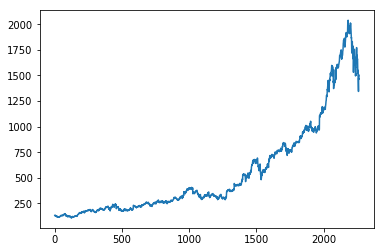

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Ploting it
plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)


First, we begin by bringing in the tools we need - matplotlib.pyplot and sklearn.preprocessing.MinMaxScaler. Then, with the help of matplotlib.pyplots plot function, were able to display a visual representation of the data we want, which in this case is the df_close data. To actually see the graph, we use the .show function. The final piece of code involves creating a new instance of MinMaxScaler and setting the range for our features to be between 0 and 1. To complete the process, we use the fit_transform function to adjust the df_close data based on the desired feature range.

In [ ]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1812 453


The purpose of this code is to divide a given dataset into two parts - a training set and a test set. To do this, we first take the total length of the dataset and multiply it by 0.80, which is the same as 80%. This number is then converted into a whole number and saved as train_size. Next, we subtract the train_size from the total length to get the length of the test set, which is saved as test_size. We then use a slicing method to split the dataset into two parts: the first part, from the beginning to the train_size, is the training set, and the second part, from the train_size to the end, is the test set. To confirm that the split was successful, the lengths of both sets are printed. This code is helpful for machine learning models because it ensures that the model is trained on most of the data and tested on the remaining portion.

**Normalize the values such that prices are reduced to normalized values and I can predict stock movement instead of actual prices**

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

This code is used to make a dataset matrix from a list of values. The function, create_dataset, has two inputs: the dataset and look_back. The default value for look_back is set to 1. The first line is a comment explaining what the function does - it turns a list of values into a dataset matrix. The next line defines the function and its inputs, with dataset as the list of values and look_back as the number of values used to create the output. The third line creates two empty lists, dataX and dataY, which will be used to store the input and output data. Then, we start a loop to go through the dataset. The loop will stop when it has gone through the second-to-last data point, as the last one will be used as the output. Inside the loop, we take the data point at index i to i + look_back, which we store as a variable called a. The next two lines add this data point to dataX and the next data point to dataY. This creates an input-output pair for the dataset. Finally, the function returns the two lists converted into numpy arrays, representing the input and output data for the dataset. In summary, this code takes a list of values, separates them into input-output pairs using a specified number of data points, and gives back the input and output lists in the form of a dataset matrix.

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

This program takes in a set of data and uses a number called look_back to divide it into two parts, called X and Y. X represents the current information, while Y represents what comes next. We use the function create_dataset to make these two parts for both the training and testing data. Essentially, we break down the dataset into smaller groups of look_back pieces each. The resulting trainX and trainY parts belong to the training data, while the testX and testY parts belong to the testing data. We will use these to teach and test a model that can predict the next piece of information in the sequence. This method is commonly used in analyzing time-based data and is helpful for forecasting future information based on past patterns.

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In this program, were using the NumPy library to change the shape of the trainX and testX arrays. This will help us use them in a way that works with recurrent neural networks RNNs. We do this by using the reshape function and telling it how we want the new shape to be. Were basically getting the data ready to be used in the next steps of our analysis.

In [ ]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.031675100326538086


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


This program is creating a sequential structure, a type of neural network used in computer learning. Initially, an example of the structure is made and added to the sequential structure. The LSTM layer is attached to the structure with an input value of 1 and an output value of 50. This will take in a series of data items and produce a set of 50 numerical values. The return_sequences feature is activated to ensure that the whole set of outputs is returned, not just the last one. Then, a layer to drop some input units randomly by 20% is added to prevent fitting too closely to the given data. The structure then adds another LSTM layer with 100 units and another layer to drop units by 20%. Following that, a dense layer is included in the structure with a single output value. This layer takes the outputs from the previous layers and generates a single number. The result is then fed through an activation function, specifically the ReLU function which replaces negative values with 0. The program also asks for the starting time and compiles the structure using the mean squared error loss, the rmsprop optimizer, and the mean absolute error metric. These are all important elements for training the structure and determining its performance. Lastly, the program reports the time it took to compile the structure and prepare it for training.

In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=80,
    validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1719 samples, validate on 91 samples
Epoch 1/80
1719/1719 [==============================] - 2s 932us/step - loss: 0.0118 - mean_absolute_error: 0.0760 - val_loss: 0.0522 - val_mean_absolute_error: 0.2278
Epoch 2/80
1719/1719 [==============================] - 0s 91us/step - loss: 0.0066 - mean_absolute_error: 0.0630 - val_loss: 0.0383 - val_mean_absolute_error: 0.1950
Epoch 3/80
1719/1719 [==============================] - 0s 86us/step - loss: 0.0051 - mean_absolute_error: 0.0564 - val_loss: 0.0274 - val_mean_absolute_error: 0.1649
Epoch 4/80
1719/1719 [==============================] - 0s 86us/step - loss: 0.0033 - mean_absolute_error: 0.0448 - val_loss: 0.0111 - val_mean_absolute_error: 0.1050
Epoch 5/80
1719/1719 [==============================] - 0s 86us/step - loss: 0.0016 - mean_absolute_error: 0.0317 - val_loss: 0.0045 - val_mean_absolute_error: 0.0670
Epoch 6/80
1719/1719 [==============================] - 0s 87us/step - loss: 5.8823e-04 - mean_absolute_error: 0.0186 

The model.fit function is used to teach a machine learning model based on the given training inputs and desired results. The first argument trainX represents the training information, while trainY represents the desired answers for the training information. The batch_size option determines how many examples will be used in each learning session. The nb_epoch option specifies how many rounds of learning will occur. The validation_split option splits some of the training information into a separate group to check the models progress. In this code, the model will be taught for 80 rounds with 128 examples at a time, and 5% of the training data will be used for validation.

**is it overtrained? lets run again with 40 epochs**

In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=40,
    validation_split=0.05)

Train on 1719 samples, validate on 91 samples
Epoch 1/40
1719/1719 [==============================] - 0s 102us/step - loss: 1.4395e-04 - mean_absolute_error: 0.0088 - val_loss: 7.2878e-05 - val_mean_absolute_error: 0.0075
Epoch 2/40
 128/1719 [=>............................] - ETA: 0s - loss: 9.1589e-05 - mean_absolute_error: 0.0062

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


1719/1719 [==============================] - 0s 95us/step - loss: 1.1378e-04 - mean_absolute_error: 0.0077 - val_loss: 7.1421e-05 - val_mean_absolute_error: 0.0073
Epoch 3/40
1719/1719 [==============================] - 0s 89us/step - loss: 1.3333e-04 - mean_absolute_error: 0.0084 - val_loss: 3.9828e-05 - val_mean_absolute_error: 0.0050
Epoch 4/40
1719/1719 [==============================] - 0s 93us/step - loss: 1.2639e-04 - mean_absolute_error: 0.0082 - val_loss: 3.1434e-05 - val_mean_absolute_error: 0.0042
Epoch 5/40
1719/1719 [==============================] - 0s 93us/step - loss: 1.2105e-04 - mean_absolute_error: 0.0080 - val_loss: 6.5291e-05 - val_mean_absolute_error: 0.0070
Epoch 6/40
1719/1719 [==============================] - 0s 88us/step - loss: 1.3959e-04 - mean_absolute_error: 0.0085 - val_loss: 4.1084e-04 - val_mean_absolute_error: 0.0196
Epoch 7/40
1719/1719 [==============================] - 0s 87us/step - loss: 1.2085e-04 - mean_absolute_error: 0.0080 - val_loss: 3.6565

This program is used to teach a machine learning system. The model.fit function needs three things - trainX, trainY, and batch_size - and can also take in two extra things - nb_epoch and validation_split. 1. trainX and trainY are the things being learned and their results, one after the other. These are used to help the model learn how to make educated guesses. 2. batch_size is how much data is worked on at a time while the model is learning. This helps the model work with large amounts of data without using too much memory. 3. The nb_epoch thing says how many times the model will learn from the data. Every time this happens, the model looks at all the data. 4. validation_split is used to break the learning data into two parts: one part for training, and the other part for checking how well the model works on data it has not seen before. In this case, 5% of the data will be used for checking and 95% for learning. This helps the model perform better on new data and not just the data it learned from. 5. The model.fit function then runs the learning process a certain number of times, using the batch size and validation split we chose. This means the model changes its internal rules using the input data and results we gave it. To sum up, this program helps a machine learning model learn from a training set and adapt its rules to make as few mistakes as it can on the data. This is an important step in making a model that can predict things.

**Final Predictions**

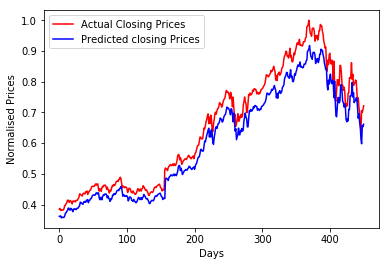

In [ ]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

Firstly, we have some code that brings in a plotting library, known as matplotlib.pyplot, to help us make graphs in Python. Then, we make a variable called predicted_stateful, which takes a model and uses it to predict some values for the test data, or testX. After that, we use the function plt.plot to make a line graph of the real closing prices, known as testY. We set the color as red and label it as Actual Closing Prices. In a similar way, we also create a graph for the predicted closing prices, using the function predicted_stateful.flatten, and label it as Predicted Closing Prices in blue. We use the functions plt.xlabel and plt.ylabel to give labels to the x-axis and y-axis respectively. Then, we use the function plt.legend to add a key to the graph with the location best. Finally, we use the function plt.show to show the graph. This code is basically used to show us the real and predicted closing prices for the test data by using a line graph.

**So LSTM  works great to predict Closing Prices when we normalize the prices and predict the stock Price movement.**

In [ ]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

1810/1810 [==============================] - 0s 28us/step


[0.00017531904821587696, 0.01169782763974772]

This bit of coding looks at how well our trained machine learning system is doing. The evaluate function takes the trainX info we put in and the correct labels from the training set trainY to figure this out. Batch_size tells us how many samples it checks each time it calculates the gradient. And the verbose can be set to 0 if we dont wanna see anything, 1 if were cool with seeing a progress bar, or 2 if we prefer one line for each round. The output number we get from this bit goes into mae which is what we use to figure out the Mean Absolute Error. This tells us how close the models predictions are to the true values - basically, it shows us how well the model fits the training info.

**Seems like using LSTM to predict stock price movement gives much better prediction resullts!!**

**Will work more on this in the next notebook..**